In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

In [5]:
# load dataset into Pandas DataFrame
file = pd.ExcelFile('MedData.xlsx')
df = pd.read_excel(file, names=['f1','f2','target'])
df

,f1,f2,target
0,700,0.14,2
1,640,0.15,2
2,690,0.15,2
3,550,0.13,2
4,650,0.15,2
...,...,...,...
95,670,0.23,3
96,630,0.19,3
97,650,0.20,3
98,620,0.23,3


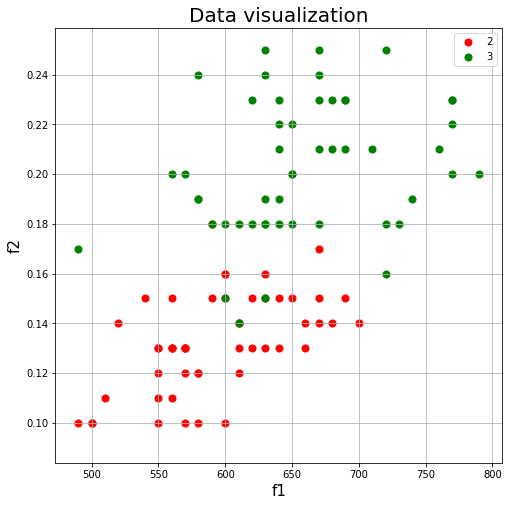

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('f1', fontsize = 15)
ax.set_ylabel('f2', fontsize = 15)
ax.set_title('Data visualization', fontsize = 20)
targets = [2, 3]
#targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df['target'] == target
    ax.scatter(df.loc[indicesToKeep, 'f1'],
               df.loc[indicesToKeep, 'f2'],
               c = color,
               s = 50)
ax.legend(targets)
ax.grid()

In [7]:
features = ['f1', 'f2']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
#y = df.loc[:,['target']].values
allData = df.values
y = allData[:,-1]


print(x[:10,:])
y

[[7.0e+02 1.4e-01]
 [6.4e+02 1.5e-01]
 [6.9e+02 1.5e-01]
 [5.5e+02 1.3e-01]
 [6.5e+02 1.5e-01]
 [5.7e+02 1.3e-01]
 [6.3e+02 1.6e-01]
 [4.9e+02 1.0e-01]
 [6.6e+02 1.3e-01]
 [5.2e+02 1.4e-01]]


array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

# KNN

In [8]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors = 5)
model.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

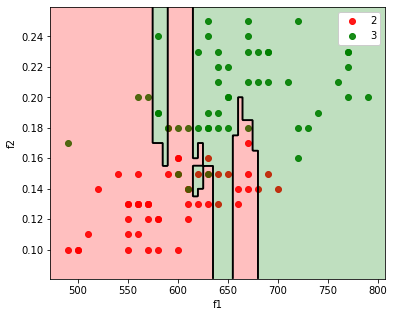

In [9]:
def draw_separ_curve(model, res = 500):
    xx0_min, xx0_max = plt.xlim()
    xx1_min, xx1_max = plt.ylim()
    xx0, xx1 = np.meshgrid(np.linspace(xx0_min, xx0_max, res), np.linspace(xx1_min, xx1_max, res))
    yy = model.predict(np.hstack((np.reshape(xx0, (res**2, 1)), np.reshape(xx1, (res**2, 1)))))   
    yy = yy.reshape(xx0.shape)
    plt.contourf(xx0, xx1, yy, 1, alpha = 0.25, colors = ('r', 'g'))
    plt.contour(xx0, xx1, yy, 1, colors = 'k')
    plt.xlim((xx0_min, xx0_max))
    plt.ylim((xx1_min, xx1_max)) 


plt.figure(figsize = (6, 5))
plt.scatter(x[y == 2, 0], x[y == 2, 1], color = 'r', alpha = 0.9, label = '2')
plt.scatter(x[y == 3, 0], x[y == 3, 1], color = 'g', alpha = 0.9, label = '3')
draw_separ_curve(model)
plt.xlabel('f1')
plt.ylabel('f2')
plt.legend(framealpha = 1)

In [10]:
print(model.predict([[700, 0.2]]))
print(model.predict_proba([[700, 0.2]]))

[3.]
[[0.2 0.8]]


In [11]:
model.score(x,y)

0.83

In [12]:
from sklearn import metrics
# make predictions
expected = y
predicted = model.predict(x)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

         2.0       0.82      0.84      0.83        50
         3.0       0.84      0.82      0.83        50

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100

[[42  8]
 [ 9 41]]


# Мне кажется мы ждали чего-то другого...

In [13]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
x_stan = StandardScaler().fit_transform(x)
print(x_stan[:10,:])

[[ 1.11900931 -0.65303909]
 [ 0.20924564 -0.41643072]
 [ 0.96738203 -0.41643072]
 [-1.15539985 -0.88964745]
 [ 0.36087292 -0.41643072]
 [-0.8521453  -0.88964745]
 [ 0.05761837 -0.17982236]
 [-2.06516352 -1.59947255]
 [ 0.5125002  -0.88964745]
 [-1.61028169 -0.65303909]]


In [14]:
from sklearn import neighbors
model_stand = neighbors.KNeighborsClassifier(n_neighbors = 5)
model_stand.fit(x_stan, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

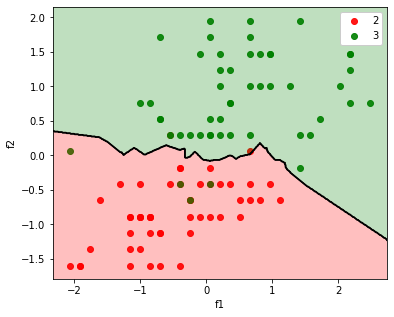

In [15]:
plt.figure(figsize = (6, 5))
plt.scatter(x_stan[y == 2, 0], x_stan[y == 2, 1], color = 'r', alpha = 0.9, label = '2')
plt.scatter(x_stan[y == 3, 0], x_stan[y == 3, 1], color = 'g', alpha = 0.9, label = '3')
draw_separ_curve(model_stand)
plt.xlabel('f1')
plt.ylabel('f2')
plt.legend(framealpha = 1)

In [16]:
print(model_stand.predict([[1.1, -0.4]]))
print(model_stand.predict_proba([[1.1, -0.4]]))

[2.]
[[0.8 0.2]]


In [17]:
model_stand.score(x_stan,y)

0.94

In [18]:
# make predictions
expected = y
predicted = model_stand.predict(x_stan)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

         2.0       0.92      0.96      0.94        50
         3.0       0.96      0.92      0.94        50

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100

[[48  2]
 [ 4 46]]


# Деревья решений

In [19]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
tree.export_graphviz(tree_model, out_file = 'iris_tree.dot', feature_names = ['f1', 'f2'])   
! dot -Tpng iris_tree.dot -o iris_tree.png 

/bin/sh: dot: command not found


In [21]:
error = np.mean(y != tree_model.predict(x))

print(error)

0.04


In [23]:
tree_model.predict(x)

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 2., 2.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 2.])

In [87]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_stan, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [83]:
tree.export_graphviz(tree_model, out_file = 'iris_tree_stan.dot', feature_names = ['f1', 'f2'])   
! dot -Tpng iris_tree_stan.dot -o iris_tree_stan.png 

In [85]:
error = np.mean(y != tree_model.predict(x_stan))

print(error)

0.04


# Багатошаровий персептрон

In [59]:
from sklearn.datasets import load_iris

iris = load_iris()
data = np.array(iris.data)
diagnoz = np.array(iris.target)


In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(data)
normalizedData = scaler.transform(data)

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(normalizedData, diagnoz, test_size = 0.33, 
                                                    random_state = 42)

In [62]:
k=len(set(y_train))
netOut=np.zeros((len(x_train),k))

for i in range(len(y_train)):
    netOut[i,int(y_train[i])-1]=1

print (netOut)

[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0.

In [63]:
alpha = 0.3 
gamma = 0.5 
h_hidden = 40
epoh=100
w1 = np.random.uniform(0, 1, (1+np.size(data,axis=1), h_hidden))
w2 = np.random.uniform(0, 1, (1+h_hidden, len(set(diagnoz))))

In [64]:
for epoch in range(epoh):
    for i in range(len(x_train)):
        input_x=np.append(1,x_train[i,:].T)
        sigfun=1/(1+np.exp(-gamma*np.dot(w1.T,input_x)));
        hidden_output = np.append(1, sigfun);
        output=1/(1+np.exp(-gamma*np.dot(w2.T,hidden_output)));
        razn = output-netOut[i,:]
        delta_c = razn*output*(1-output);
        delta_h = (np.dot(w2,delta_c))*hidden_output*(1-hidden_output);
        delta_h=np.delete(delta_h,0,0)
        w1 = w1 - alpha*np.dot(input_x.reshape(np.size(input_x),1),delta_h.reshape(1,np.size(delta_h)));
        w2 = w2 - alpha*np.dot(hidden_output.reshape(np.size(hidden_output),1),delta_c.reshape(1,np.size(delta_c)));


In [65]:
k=len(set(y_test))
netOutTest=np.zeros((len(x_test),k))

for i in range(len(y_test)):
    netOutTest[i,int(y_test[i])-1]=1

print (netOutTest)

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [66]:
accurance=0
for i in range(len(x_test)):
    input_x = np.append(1, x_test[i,:].T);
    sigfun=1/(1+np.exp(-gamma*np.dot(w1.T,input_x)));
    hidden_output = np.append(1, sigfun);
    output=1/(1+np.exp(-gamma*np.dot(w2.T,hidden_output)));
    if np.argmax(netOutTest[i,:]) == np.argmax(output):
        accurance+=1

print(accurance)

49


In [68]:
from sklearn.neural_network import MLPClassifier

# create mutli-layer perceptron classifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

# train
clf.fit(x_train, y_train)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [69]:
expected = y_test
predicted = clf.predict(x_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
